In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


In [30]:
X, y = load_data()
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size = 0.8, shuffle=True)

In [31]:
# Viewing and Checking Data
# print(y[0, 0])
# print(y[-1, 0])
# print(X.shape)
# print(y.shape)
print(X_train.shape)
print(Y_train.shape)

(800, 400)
(800, 1)


<a name="toc_89367_2.2.3"></a>
#### 2.2.3 Visualizing the Data

You will begin by visualizing a subset of the training set. 
- In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together. 
- The label for each image is displayed above the image 

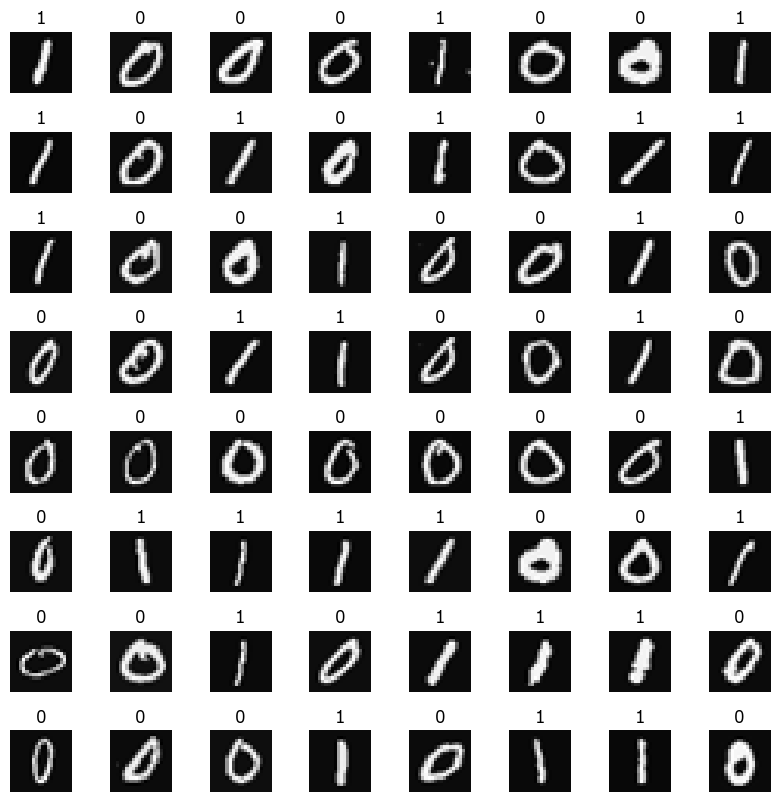

In [32]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(8,8)) # 8*8 table
fig.tight_layout(pad=0.1) # padding

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(Y_train[random_index,0])
    ax.set_axis_off()

In [33]:
# There are two methods to initialize the model:

# Method 1:
model = Sequential([tf.keras.Input(shape=(400, )), tf.keras.layers.Dense(25, activation='sigmoid'), tf.keras.layers.Dense(15, activation='sigmoid'), tf.keras.layers.Dense(1, activation='sigmoid')])

# Method 2:
# model = Sequential()
# model.add(tf.keras.Input(shape=(400, ))) # specify input size
# model.add(tf.keras.layers.Dense(25, activation='sigmoid')) # First layer of 25 units
# model.add(tf.keras.layers.Dense(15, activation='sigmoid')) # Second layer of 5 units
# model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Third layer of 1 units

In [34]:
model.summary() # Print summary of them

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,431 (40.75 KB)

 Trainable params: 10,431 (40.75 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Double checking the layers
[layer1, layer2, layer3] = model.layers

W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()

# In numpy format
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

# In tensor format
print(f"In tensor format: {model.layers[2].weights}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)
In tensor format: [<Variable path=sequential_1/dense_5/kernel, shape=(15, 1), dtype=float32, value=[[-0.50828207]
 [-0.42144042]
 [ 0.01997524]
 [ 0.45940357]
 [-0.30206886]
 [-0.59524786]
 [ 0.03470051]
 [-0.32248768]
 [ 0.50929433]
 [-0.19078049]
 [-0.24569541]
 [ 0.3567884 ]
 [ 0.60314196]
 [ 0.40878826]
 [ 0.04980385]]>, <Variable path=sequential_1/dense_5/bias, shape=(1,), dtype=float32, value=[0.]>]


The following code will define a loss function and run gradient descent to fit the weights of the model to the training data. This will be explained in more detail in the following week.

In [36]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(0.001))
model.fit(X_train, Y_train, epochs=20)

Epoch 1/20


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6617   
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5267 
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3904 
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2808 
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2076 
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1651 
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1231 
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1037 
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0896 
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0805 
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0626 
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0675 
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0505 
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0436 
Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0432 
Epoch 16/20
2

In [37]:
# Making predictions after building the layers for the model
pred0 = model.predict(X[0].reshape(1, 400)) # P(is a 0)
pred1 = model.predict(X[500].reshape(1, 400)) # P(is a 1)
print(pred0, pred1) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.02291845]] [[0.98030245]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

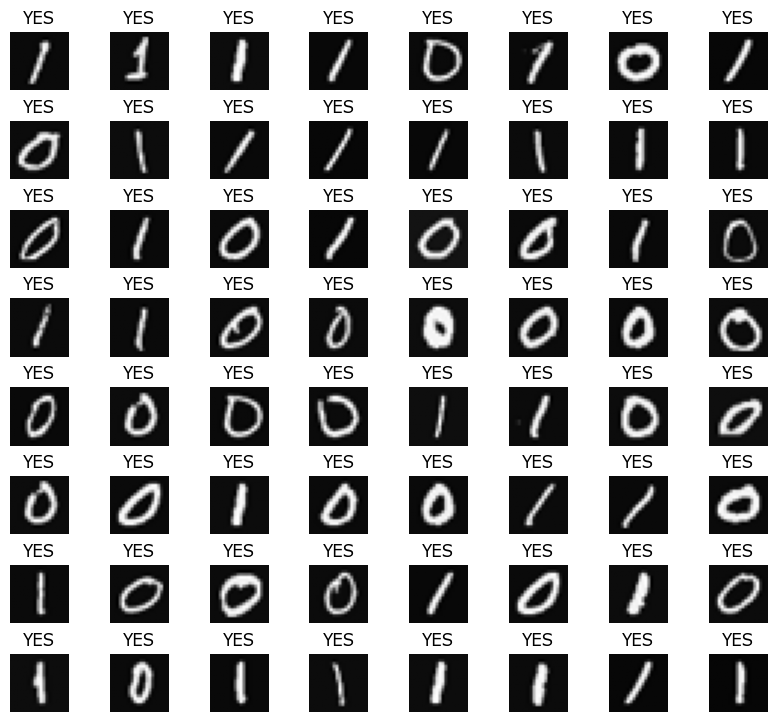

In [162]:
m, n = X_test.shape 

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92])


for i, ax in enumerate(axes.flat):
    idx = np.random.randint(m) # get random index from test data
    X_random = X_test[idx].reshape((20, 20)).T # convert to right format    
    ax.imshow(X_random, cmap='gray')

    pred = model.predict(X_test[idx].reshape(1, 400))
    if pred >= 0.5:
        yhat = 1
    else:
        yhat = 0

    if yhat == Y_test[idx]:
        title = "YES"
    else:
        title = "NO"

    ax.set_title(title)
    ax.set_axis_off()

plt.show()

In [ ]:
# TODO: Print out wrong predictions